# AI502/KSE527, Homework 01

This file is made by Jaehoon Oh, which is modified based on https://github.com/floydhub/regression

In [1]:
import torch
import torch.nn as nn
import torch.utils.data

In [2]:
POLY_DEGREE = 4
torch.manual_seed(2020)
W_target = torch.randn(POLY_DEGREE, 1) * 5
b_target = torch.randn(1) * 5

In [3]:
def poly_desc(W, b):
    """Creates a string description of a polynomial."""
    result = 'y = '
    for i, w in enumerate(W):
        result += '{:+.2f} x^{} '.format(w, len(W) - i)
    result += '{:+.2f}'.format(b[0])
    return result

In [4]:
print('==> The real function you should approximate:\t' + poly_desc(W_target.view(-1), b_target))

==> The real function you should approximate:	y = +6.19 x^4 -4.80 x^3 +7.71 x^2 -2.04 x^1 +4.40


---

In [5]:
def make_features(x):
    """Builds features i.e. a matrix with columns [x^4, x^3, x^2, x^1]."""
    x = x.unsqueeze(1)
    return torch.cat([x ** (POLY_DEGREE+1-i) for i in range(1, POLY_DEGREE+1)], 1)

In [6]:
def f(x):
    """Approximated function."""
    return x.mm(W_target) + b_target[0]

In [7]:
def get_dataset(dataset_size):
    """Builds a batch i.e. (x, f(x)) pair."""
    random = torch.randn(dataset_size)
    x = make_features(random)
    y = f(x)
    dataset = list(zip(x, y))
    return dataset

In [8]:
dataset = get_dataset(200) # you can make as many as dataset as you want

---

In [9]:
num_epochs = 500
batch_size = 50
learning_rate = 0.1
criterion = nn.SmoothL1Loss()

In [10]:
dataset_loader = torch.utils.data.DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)

---

In [11]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc = nn.Linear(W_target.size(0), 1)
        
        # For fixing the initial weights and bias
        self.fc.weight.data.fill_(0.)
        self.fc.bias.data.fill_(0.)
        
    def forward(self, x):
        output = self.fc(x)
        return output

In [12]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("running on GPU")
else:
    device = torch.device("cpu")
    print("running on CPU")

running on GPU


---

In [45]:
import time

MODEL_NAME = f"model-{int(time.time())}"
print(MODEL_NAME)

def fit(model,loader,criterion,learning_rate,num_epochs):
    model.train()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    with open("model2.log", "a") as f:
        
        for epoch in range(num_epochs):
            for i, data in enumerate(loader):
                if torch.cuda.is_available():
                    x = data[0].type(torch.FloatTensor).cuda()
                    y = data[1].type(torch.FloatTensor).cuda()
                else:
                    x = data[0].type(torch.FloatTensor)
                    y = data[1].type(torch.FloatTensor)   



                y_hat = model(x)
                loss = criterion(y_hat, y)

                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                f.write(f"{MODEL_NAME}, {epoch}, {round(time.time(),3)},{round(float(loss), 4)}\n")


model-1585490285


In [23]:
import time

MODEL_NAME = f"model-{int(time.time())}"
print(MODEL_NAME)

LOSS = []
EPOCHS = []

def fit(model,loader,criterion,learning_rate,num_epochs):
    model.train()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    with open("model2.log", "a") as f:
        
        for epoch in range(num_epochs):
            for i, data in enumerate(loader):
                if torch.cuda.is_available():
                    x = data[0].type(torch.FloatTensor).cuda()
                    y = data[1].type(torch.FloatTensor).cuda()
                else:
                    x = data[0].type(torch.FloatTensor)
                    y = data[1].type(torch.FloatTensor)   



                y_hat = model(x)
                loss = criterion(y_hat, y)

                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                LOSS.append(loss)
                EPOCHS.append(epoch)
                #f.write(f"{MODEL_NAME}, {epoch}, {round(time.time(),3)},{round(float(loss), 4)}\n")


model-1585899094


---

In [24]:
net = Net().cuda() if torch.cuda.is_available() else Net()
print('==> Initial function:\t' + poly_desc(net.fc.weight.data.view(-1), net.fc.bias.data))
print('==> Actual function:\t' + poly_desc(W_target.view(-1), b_target))

==> Initial function:	y = +0.00 x^4 +0.00 x^3 +0.00 x^2 +0.00 x^1 +0.00
==> Actual function:	y = +6.19 x^4 -4.80 x^3 +7.71 x^2 -2.04 x^1 +4.40


In [25]:
# train
fit(net,dataset_loader,criterion,learning_rate,num_epochs)

In [26]:
print('==> Learned function:\t' + poly_desc(net.fc.weight.data.view(-1), net.fc.bias.data))
print('==> Actual function:\t' + poly_desc(W_target.view(-1), b_target))

==> Learned function:	y = +5.92 x^4 -4.74 x^3 +7.59 x^2 -2.03 x^1 +4.34
==> Actual function:	y = +6.19 x^4 -4.80 x^3 +7.71 x^2 -2.04 x^1 +4.40


c:\users\trojan\appdata\local\programs\python\python37\lib\site-packages\scipy\interpolate\interpolate.py:610: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
c:\users\trojan\appdata\local\programs\python\python37\lib\site-packages\scipy\interpolate\interpolate.py:613: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


<Figure size 432x288 with 0 Axes>

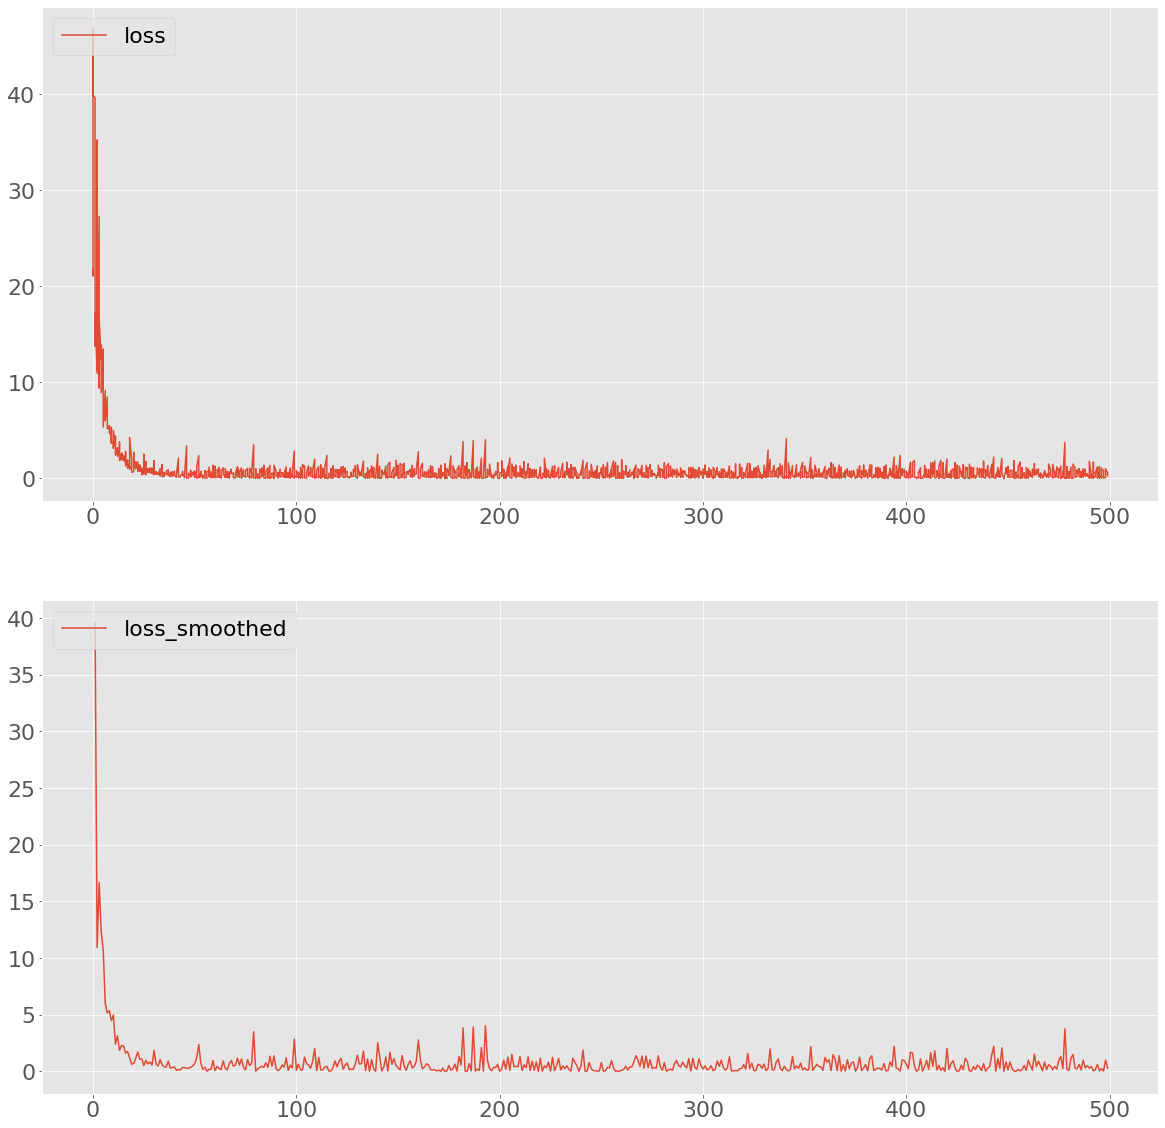

In [29]:
#In EPOCH Form

%matplotlib notebook
%matplotlib inline


import matplotlib.pyplot as plt
from matplotlib import style
from scipy.interpolate import interp1d
style.use("ggplot")
#model_name = "model-1585490285" #or MODEL_NAME



fig = plt.figure() #for multiple figurs, for one thing just use plt.plot(times, accuracies) and plt.show()
plt.figure(figsize=(20,20))
plt.rcParams.update({'font.size': 22})

f = interp1d(EPOCHS, LOSS)

#define axis, each axis is a graph
ax1 = plt.subplot2grid((2,1), (0,0))
ax2 = plt.subplot2grid((2,1), (1,0), sharex=ax1)

ax1.plot(EPOCHS, LOSS, label="loss")
ax1.legend(loc=2)
ax2.plot(EPOCHS, f(EPOCHS), label="loss_smoothed")
ax2.legend(loc=2)   
plt.show()   


<Figure size 432x288 with 0 Axes>

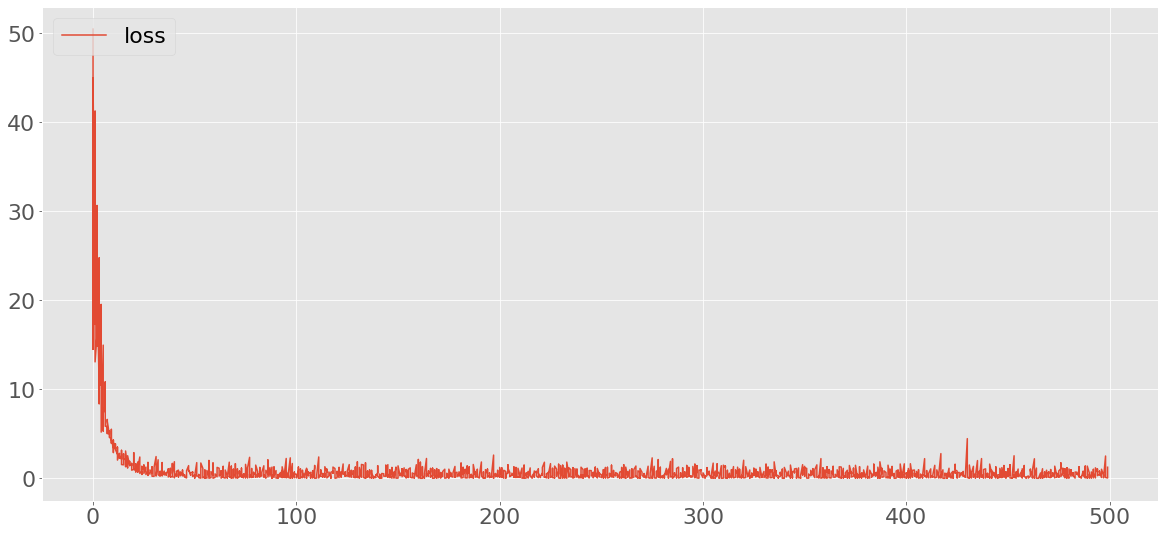

In [52]:
#In EPOCH Form

%matplotlib notebook
%matplotlib inline


import matplotlib.pyplot as plt
from matplotlib import style
from scipy.interpolate import interp1d
style.use("ggplot")
model_name = "model-1585490285" #or MODEL_NAME

def create_acc_loss_graph(model_name):
    contents = open("model2.log", "r").read().split('\n')
    
    epochs = []
    times = []
    losses = []
    
    for c in contents:
        if model_name in c:
            name, epoch, timestamp, loss = c.split(",")
            
            epochs.append(float(epoch))
            times.append(float(timestamp))
            losses.append(float(loss))

    fig = plt.figure() #for multiple figurs, for one thing just use plt.plot(times, accuracies) and plt.show()
    plt.figure(figsize=(20,20))
    plt.rcParams.update({'font.size': 22})

    
    #define axis, each axis is a graph
    ax1 = plt.subplot2grid((2,1), (0,0))
    #ax2 = plt.subplot2grid((2,1), (1,0), sharex=ax1)

    ax1.plot(epochs, losses, label="loss")
    #ax1.plot(epochs, val_accs, label="val_acc")
    ax1.legend(loc=2)
    '''ax2.plot(epochs,losses, label="loss")
    ax2.plot(epochs,val_losses, label="val_loss")'''
    #ax2.legend(loc=2)
    
    plt.show()   
    
    
    
create_acc_loss_graph(model_name)

In [55]:
#In EPOCH Form

%matplotlib notebook
%matplotlib inline


import matplotlib.pyplot as plt
from matplotlib import style
from scipy.interpolate import interp1d
style.use("ggplot")
model_name = "model-1585490285" #or MODEL_NAME

def create_acc_loss_graph(model_name):
    contents = open("model2.log", "r").read().split('\n')
    
    epochs = []
    times = []
    losses = []
    
    for c in contents:
        if model_name in c:
            name, epoch, timestamp, loss = c.split(",")
            
            epochs.append(float(epoch))
            times.append(float(timestamp))
            losses.append(float(loss))

    fig = plt.figure() #for multiple figurs, for one thing just use plt.plot(times, accuracies) and plt.show()
    plt.figure(figsize=(20,20))
    plt.rcParams.update({'font.size': 22})

    f = interp1d(epochs, losses)
    #define axis, each axis is a graph
    ax1 = plt.subplot2grid((2,1), (0,0))
    ax2 = plt.subplot2grid((2,1), (1,0), sharex=ax1)

    ax1.plot(epochs, losses, label="loss")
    #ax1.plot(epochs, val_accs, label="val_acc")
    ax1.legend(loc=2)
    ax2.plot(epochs, f(epochs), label="loss_smoothed") #smoothed plot
    #ax2.plot(epochs,val_losses, label="val_loss")
    ax2.legend(loc=2)
    
    plt.show()   
    
    
    
create_acc_loss_graph(model_name)

ValueError: Expect x to be a 1-D sorted array_like.

<Figure size 432x288 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

In [60]:
Real function = poly_desc(W_target.view(-1), b_target)
Learned function = poly_desc(net.fc.weight.data.view(-1), net.fc.bias.data)

print("real function is: "Real function)
print("learned function is: "Learned function)

SyntaxError: invalid syntax (<ipython-input-60-2005f221f0c8>, line 1)

[-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919
  -8.98989899  -8.78787879  -8.58585859  -8.38383838  -8.18181818
  -7.97979798  -7.77777778  -7.57575758  -7.37373737  -7.17171717
  -6.96969697  -6.76767677  -6.56565657  -6.36363636  -6.16161616
  -5.95959596  -5.75757576  -5.55555556  -5.35353535  -5.15151515
  -4.94949495  -4.74747475  -4.54545455  -4.34343434  -4.14141414
  -3.93939394  -3.73737374  -3.53535354  -3.33333333  -3.13131313
  -2.92929293  -2.72727273  -2.52525253  -2.32323232  -2.12121212
  -1.91919192  -1.71717172  -1.51515152  -1.31313131  -1.11111111
  -0.90909091  -0.70707071  -0.50505051  -0.3030303   -0.1010101
   0.1010101    0.3030303    0.50505051   0.70707071   0.90909091
   1.11111111   1.31313131   1.51515152   1.71717172   1.91919192
   2.12121212   2.32323232   2.52525253   2.72727273   2.92929293
   3.13131313   3.33333333   3.53535354   3.73737374   3.93939394
   4.14141414   4.34343434   4.54545455   4.74747475   4.94949495
   5.151515

<Figure size 432x288 with 0 Axes>

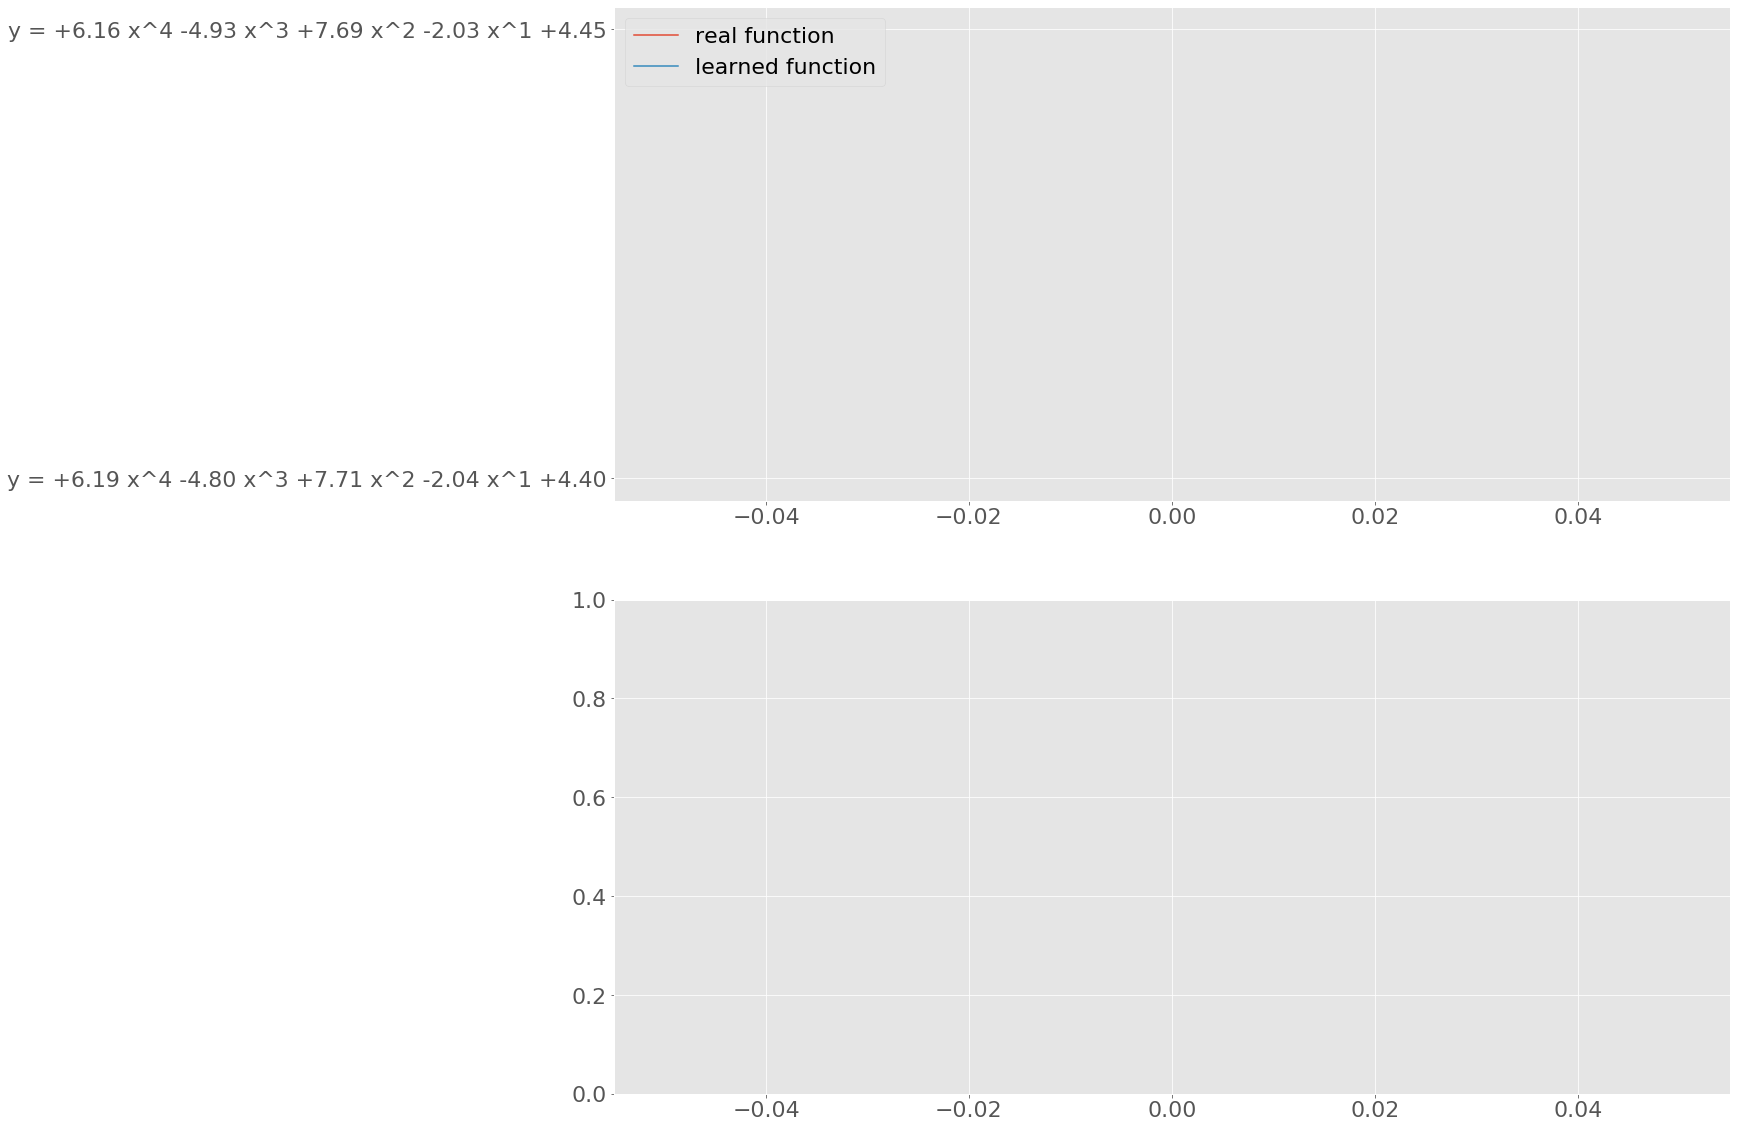

In [66]:
#In EPOCH Form

%matplotlib notebook
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from scipy.interpolate import interp1d
style.use("ggplot")
#model_name = "model-1585490285" #or MODEL_NAME

p = np.linspace(-10, 10, num=100)
print(p)

fig = plt.figure() #for multiple figurs, for one thing just use plt.plot(times, accuracies) and plt.show()
plt.figure(figsize=(20,20))
plt.rcParams.update({'font.size': 22})

#f = interp1d(epochs, losses)
#define axis, each axis is a graph
ax1 = plt.subplot2grid((2,1), (0,0))
ax2 = plt.subplot2grid((2,1), (1,0), sharex=ax1)

ax1.plot(poly_desc(W_target.view(-1), b_target), label="real function")
ax1.plot(poly_desc(net.fc.weight.data.view(-1), net.fc.bias.data), label="learned function")
ax1.legend(loc=2)
#ax2.plot(epochs, f(epochs), label="loss_smoothed") #smoothed plot
#ax2.plot(epochs,val_losses, label="val_loss")
#ax2.legend(loc=2)
    
plt.show()   
    
    
